<a href="https://www.kaggle.com/code/faizulislam19095/linear-regression-in-ml-intuition-notes-codes?scriptVersionId=197062336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Hello everyone! Let's discuss the agenda of this notebook:**

* **To explain Simple Linear Regression in details (with Mathematical intuition + Code)**
* **To explain Multiple Linear Regression in details (with Mathematical intuition + Code)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydf = pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")
mydf.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
# Shape of the dataset
mydf.shape

(50000, 6)

**There are 50000 rows and 6 columns in this dataset**

In [4]:
# Checking for null values
mydf.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [5]:
# Checking for duplicated values
mydf.duplicated().sum()

0

**There are no duplicated values**

In [6]:
# Overview of the entire dataset 

mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


Okay, the data seems preety good and cleaned! Since our objective is to learn the linear regression algorithm so we won't dive much in things like EDA and all for now and also we will keep only the continuous variables.So we will,
* Remove the Neighborhood column (Since it is a categorical variable)
* Round the Price

In [7]:
df = mydf.drop('Neighborhood',axis=1)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.283618
1,2459,3,2,1980,195014.221626
2,1860,2,1,1970,306891.012076
3,2294,2,1,1996,206786.787153
4,2130,5,2,2001,272436.239065


In [8]:
# Rounding the price 
df['Price'] = round(df["Price"]).astype('int')
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355
1,2459,3,2,1980,195014
2,1860,2,1,1970,306891
3,2294,2,1,1996,206787
4,2130,5,2,2001,272436


Let's start with the introduction...

The regression analysis is a technique of studying the dependence of one variable (dependent variable) on one or more variables (independent variable) with a view to estimating or predicting the average or the dependent variable in terms of the known or fixed value of the independent variable(s).Regression means probable change of the dependent variable for the unit change of the independent variable.
Linear Regression is classified into three types:
* Simple Linear Regression
* Multile Linear Regression
* Polynomial Regression

Now we will discuss why the types are specifically named like this! Let's break the terms in small chunks.

**Simple Linear Regression :** The straightforward explanation behind naming it "Simple" is that- in these type of regression there are only one independent variable and one dependent variable. Let's consider an example.Suppose we have a dataset which only has two variables- income(independent variable) and expenditure(dependent variable). The term "Linear" actually means we are specifically talking about linearity in the parameters, The linearity in parameters means that the relationship between the variables is expressed as a linear combination of the model parameters.





**Multiple Linear Regression:** The term "Mutiple" means there are one dependent variable and more than one independent variable in the regression model. Suppose we have a dataset which has three variables- income,number_of_family_members (independent variables) and expenditure(dependent variable)


**Polynomial Regression:** Polynomial regression is a form of regression analysis where the relationship between the dependent variable and the independent variable is modeled as an n\-th degree polynomial. It allows for capturing non-linear relationships by introducing polynomial terms.



**In this notebook we will mainly discuss on Simple Linear Regression and Multiple Linear Regression.
Let's make two different dataset for these two models.**

**simpledf : For simple linear regression model. We will consider only two variables- SquareFeet(independent variable) and Price(dependent variable)**


In [9]:
simpledf = df[['SquareFeet','Price']]
simpledf.head()

,SquareFeet,Price
0,2126,215355
1,2459,195014
2,1860,306891
3,2294,206787
4,2130,272436


**Without any further adue, let's deep dive into the main discussion!**

# Simple Linear Regression (Mathematical intuition)

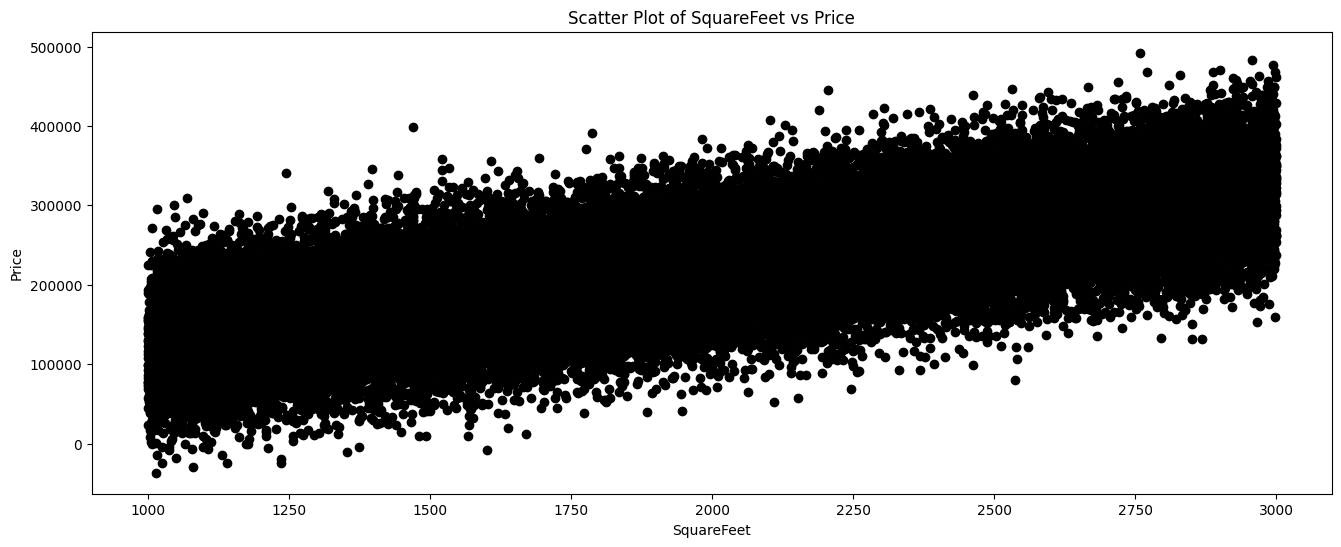

In [10]:
# First we will plot the data

plt.figure(figsize=(16,6))
plt.scatter(simpledf['SquareFeet'],simpledf['Price'],color='black')
plt.title('Scatter Plot of SquareFeet vs Price')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()

**It is clearly visible that plot is sort of linear,not exactly linear. A question can arise, Why the data is not exactly linear? The answer is pretty straightforward. This is a real life dataset. And the situations in real life do not always follow the perfect scenario. The plot shows that there are some houses which are not very big in terms of the square feet but they are expensive and on the other hand, some houses are big not not as expensive as other houses inspite having same size (square feets).This might happen for many reasons.Real world data are affected by real world factor.So it's quite impossible to find real life data that are exactly linear,most of the data we will encounter are sort of linear!
If the data were linear the analysis and prediction would be much much easier, we would simply draw a line and could easily predict the value for new observation.But unfortunately (I guess) we don't have many PERFECT situations.As I mentioned, in the case of exact linear relationship, we would draw a line that would pass through all the points in the plot.But since we are dealing with data that is sort of linear so just think, we can't draw a line that passes through all the points in the plot unlike for the exact linear case.However, we will draw a line that is best fitted that means we have to draw a line in such a way that it passes through as close as possible from the points.(Making the minimum mistakes)**

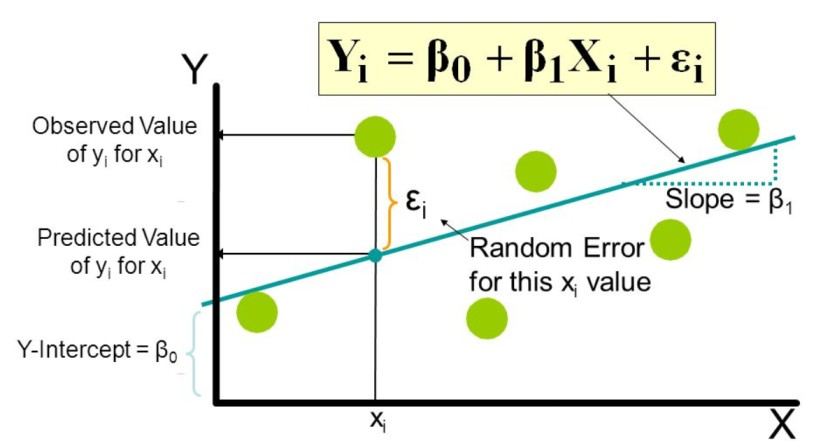

**Now let's answer the most obvious quesion, "How would you know,the line you are drawing is the best fitted?"**

Before answering that let's first brush-up the concepts of a straight line!


The ideal equation of a straight line is   **y= m*x + b**. Yes, it is same as **y= beta_1 * x + beta_0**
* **Here m and beta_1 both represents slope**
* **b and beta_0 both represents Y-intercept**

But what they actually mean?!!

**slope -** In simple words, slope represents the change in the dependent variable due to one-unit change in the independent variable. Let's consider an example for better understanding. In our housing price dataset(simpledf), the equation of the line is,  **Price = beta_1*SquareFeet + beta_0** . Here slope(m) is representing how the Price of house changes due to one-unit change in SquareFeet. 

**intercept -** In simple words, intercept represents what would be the value of the the dependent variable in absence of the independent variable.Let's consider a relevant example for this. Let's say we have a dataset which has two variable- YearsOfExperience  and Salary. The line of the equation in this case would be, 

**Salary = beta_1*YearsOfExperience + beta_0** . Let's say we have a fresh graduate who don't have any prior experience (that means YearsOfExperience=0) so we will get Salary = beta_1 * 0 + beta_0 that means Salary=beta_0. So even though he don't have any experience that doesn't mean he won't get paid.

So, we have to find the value of beta_1 and beta_0 in such a way that gives the equation of our desired **best fitted line**
The values of beta_1 and beta_0 can be obtained in two different ways.

**By using direct formula : We will use Ordinary Least Square (OLS) here. Scikit-learn by default use OLS**

**By using approximation based technique : We will use Gradient Descent here**


**Derivation of beta_0 and beta_1 by Ordinary Least Squares (OLS) method**

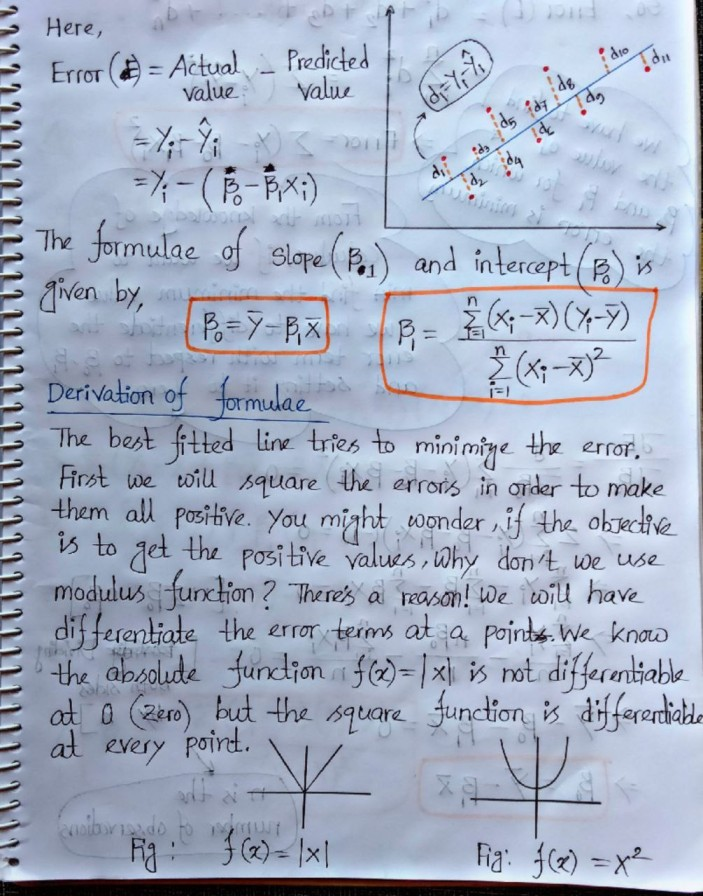

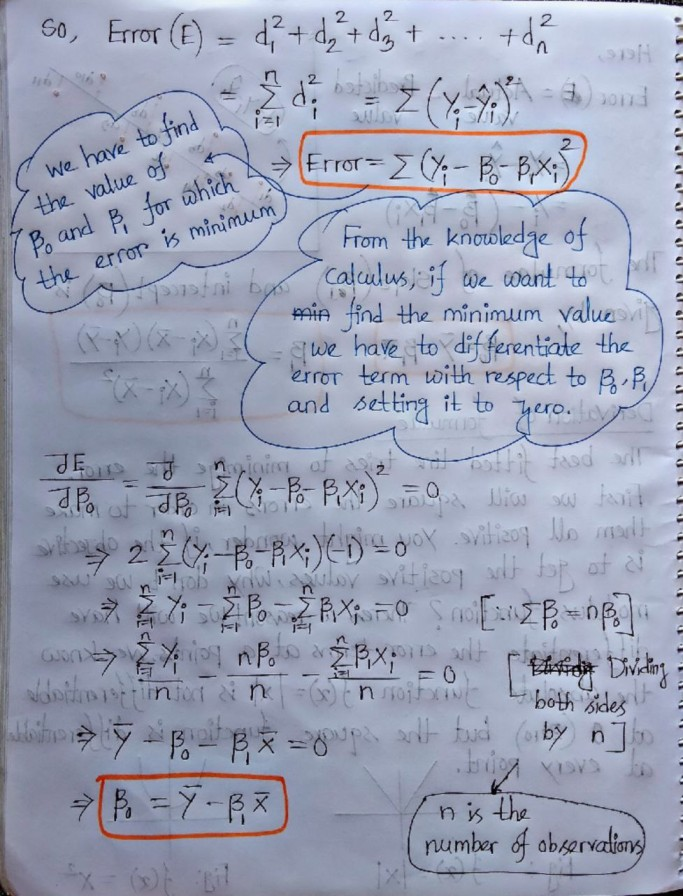

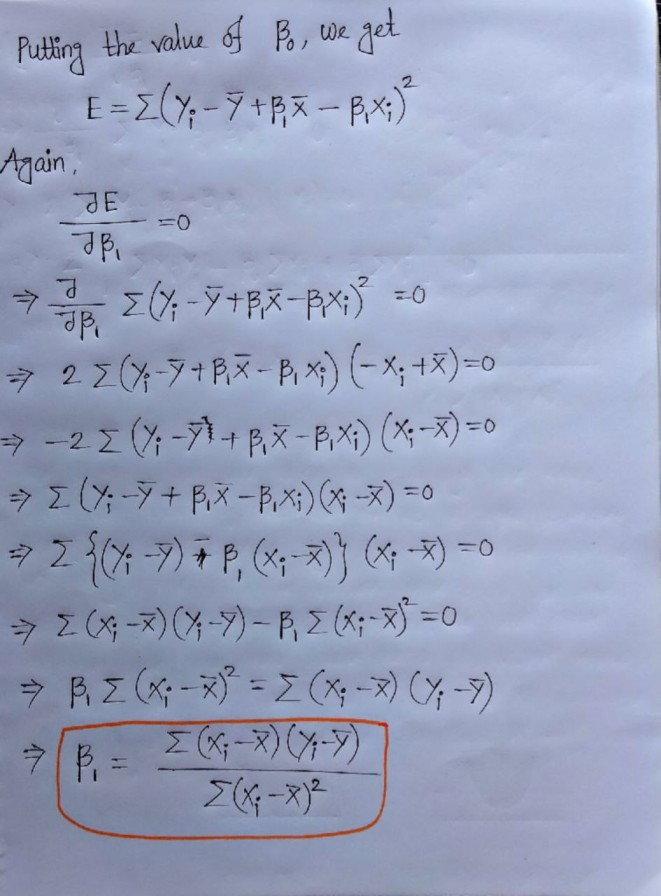

# Simple Linear Regression (Code)

In [11]:
X = simpledf['SquareFeet']
Y = simpledf['Price']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [13]:
X_train_reshaped = X_train.values.reshape(-1, 1)
Y_train_reshaped = Y_train.values
X_test_reshaped = X_test.values.reshape(-1, 1)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
simpleLR = LinearRegression()

In [16]:
simpleLR.fit(X_train_reshaped, Y_train_reshaped)

LinearRegression()

In [17]:
Y_pred = simpleLR.predict(X_test_reshaped)

Text(0, 0.5, 'Price of houses')

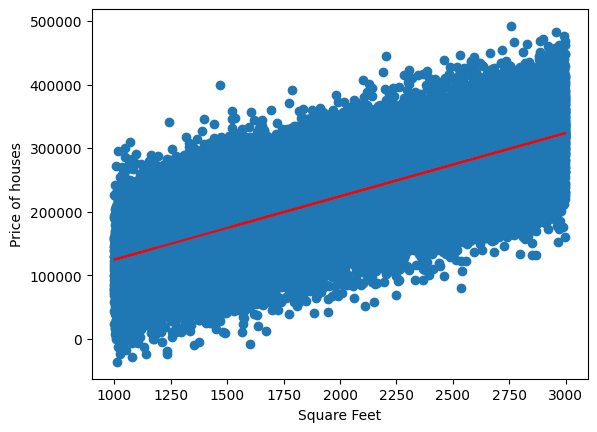

In [18]:
plt.scatter(simpledf['SquareFeet'],simpledf['Price'])
plt.plot(X_train,simpleLR.predict(X_train_reshaped),color='red')
plt.xlabel('Square Feet')
plt.ylabel('Price of houses')

In [19]:
# Value of the slope (beta_1)

beta_1 = simpleLR.coef_
print(f'The value of slope is {beta_1}')

The value of slope is [99.5991975]


In [20]:
# Value of the intercept (beta_0)

beta_0 = simpleLR.intercept_
print(f'The value of intercept is {round(beta_0,2)}')

The value of intercept is 24873.78


**So the regression line is ,   Price = 99.5991975*SquareFeet + 24873.78**

# Multiple Linear Regression (Mathematical intuition)

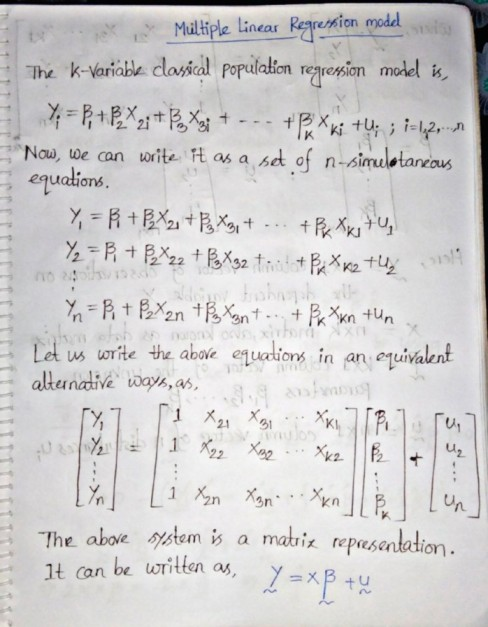

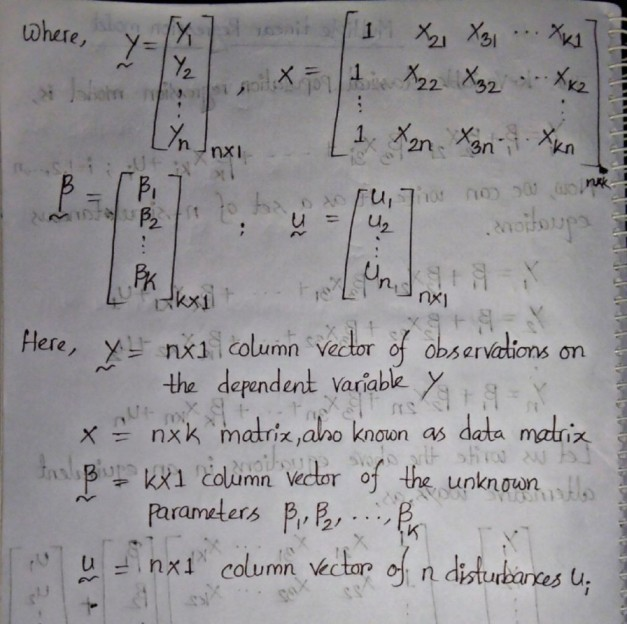

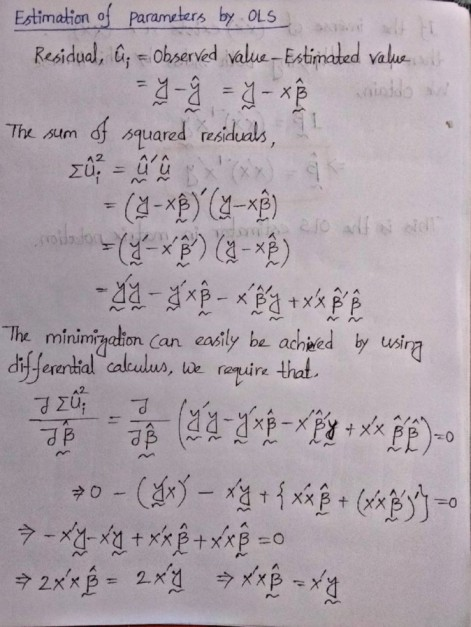

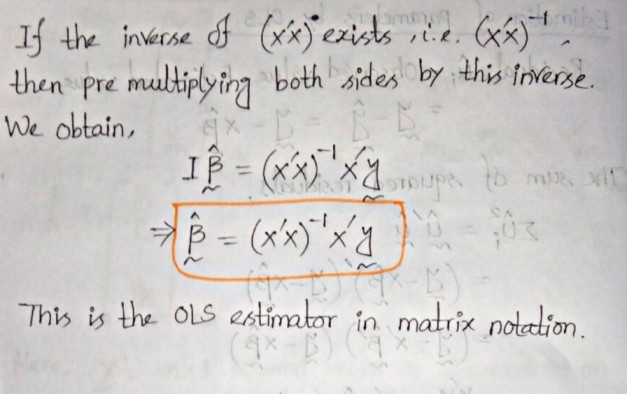

# Multiple Linear Regression (Code)

In simple linear regression we were concerned about drawing the best fitted **line** but in this case we are concerned about drawing a **plane** since there are more than one independent variable so the dimension increases.

In [21]:
import plotly.express as px
import plotly.graph_objects as go
multipledf = df[['Bedrooms','SquareFeet','Price']]
multipledf.head()

,Bedrooms,SquareFeet,Price
0,4,2126,215355
1,3,2459,195014
2,2,1860,306891
3,2,2294,206787
4,5,2130,272436


In [22]:
x = df.drop('Price',axis=1)
y = df['Price']

In [23]:
x.shape

(50000, 4)

In [24]:
y.shape

(50000,)

In [25]:
multipledf.shape

(50000, 3)

In [26]:
multipledf.shape

(50000, 3)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [28]:
multipleLR = LinearRegression()

In [29]:
multipleLR.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = multipleLR.predict(X_test)

In [31]:
# Values of the coefficients 

multipleLR.coef_

array([  99.40275756, 4948.33274032, 3023.0954303 ,  -12.45363039])

In [32]:
multipleLR.intercept_

26698.571122922876

<div style="background-color:black; color:white; padding:20px; font-size:24px; font-weight:bold; text-align:left; border-radius:70px;"> 
      If this notebook helps, please consider UPVOTING. Happy learning! 😊 
</div>
